In [1]:
%load_ext autoreload
%autoreload 2
from readers.base import NeuralynxReader
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, decimate
import numpy as np
import pandas as pd
import stumpy
from numba import cuda
import matplotlib.colors as mcolors
from detectors.motives import MotifFinder
%matplotlib tk

In [2]:
# rootdir, channel = '/media/sil2/Data/Lizard/Pogona Data/Lizard15/12.14.2015/18-26-12_cheetah', 32  # mark
rootdir, channel = '/media/sil2/Data/Lizard/lorenz_data/2019-11-17_17-43-33', 31  # lorenz
# rootdir, channel = '/media/sil2/Data/Lizard/lorenz_data/2019-10-21_18-00-39', 31  # lorenz - no claustrum
rd = NeuralynxReader(rootdir, channel=channel)
print(f'Reader initialized. fs={rd.fs:.0f}Hz, duration={rd.time_vector[-1]/3600:.1f} hours')

Reader initialized. fs=32000Hz, duration=15.5 hours


Finish calculating matrix profile with window of 1.2 seconds in 7.5 minutes.
Finish calculating matrix profile with window of 0.5 seconds in 8.0 minutes.
Finish calculating matrix profile with window of 0.3 seconds in 8.1 minutes.
CPU times: user 19min 59s, sys: 3min 52s, total: 23min 52s
Wall time: 23min 50s


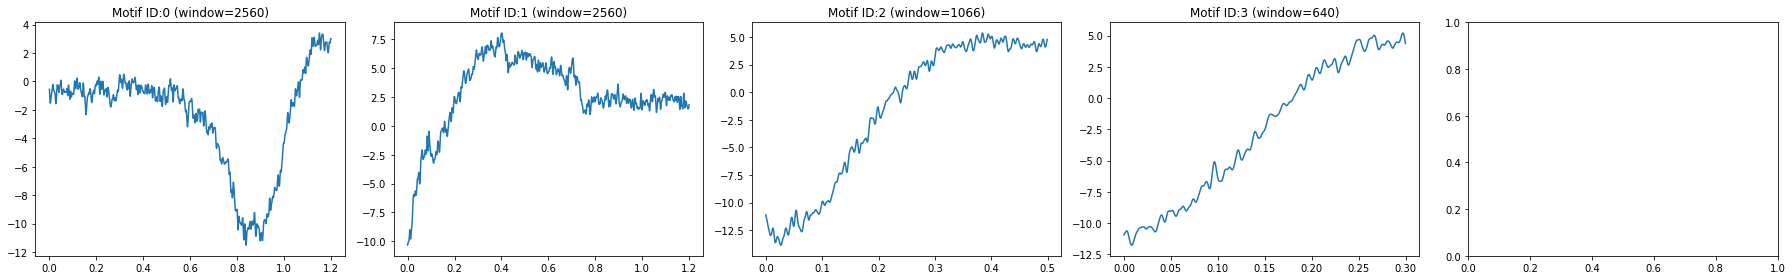

In [3]:
%%time
%matplotlib inline
sc = rd.load_slow_cycles()
cycle_id = 0
mf = MotifFinder(rd, decimate_q=15, lowpass=150, filter_order=3)
mf.search(t_start=sc.loc[cycle_id, 'on'], t_stop=sc.loc[cycle_id+1, 'off'], durations=[1.2, 0.5, 0.3],
          durations2remove=[])
mf.plot_found_motives()

In [7]:
%matplotlib tk
cycle_id = 50
mf.plot_labelled_signal(t_start=sc.loc[cycle_id, 'on'], t_stop=sc.loc[cycle_id, 'off'], motives_ids=[0,1,2,3],
                        max_dist=20, separate_windows=True)

Motif ID: 0; Finish mass motif search in 0.0 minutes. # of motives found: 5
Motif ID: 1; Finish mass motif search in 0.0 minutes. # of motives found: 5
Motif ID: 2; Finish mass motif search in 0.0 minutes. # of motives found: 72
Motif ID: 3; Finish mass motif search in 0.0 minutes. # of motives found: 197


In [9]:
sc.loc[cycle_id, 'off']

14261.0

Motif ID: 6; Finish full mass motif search in 1.2 minutes.


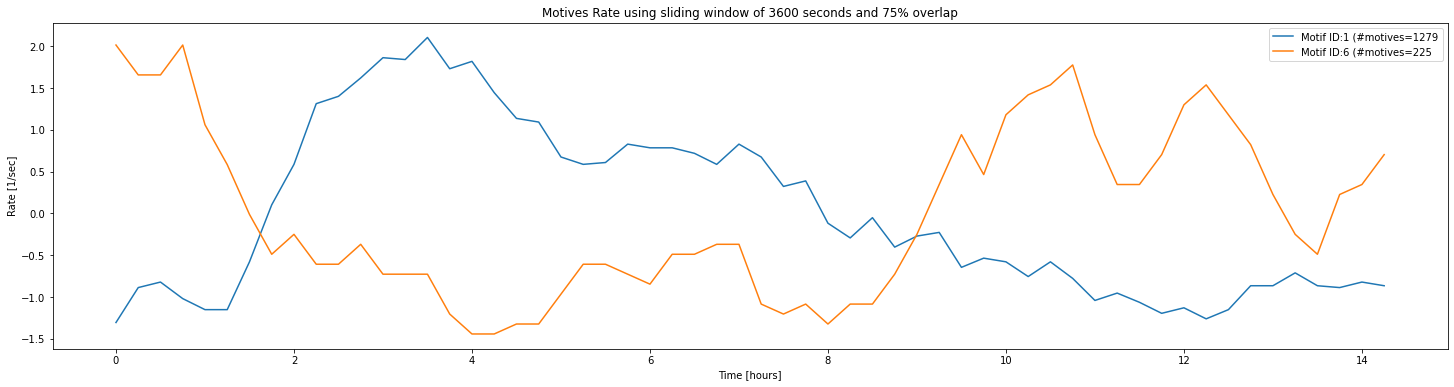

In [54]:
mf.plot_motif_rate_vs_time([1, 6], threshold=15, rate_window=3600, is_normalize=True)

ERROR! Session/line number was not unique in database. History logging moved to new session 118


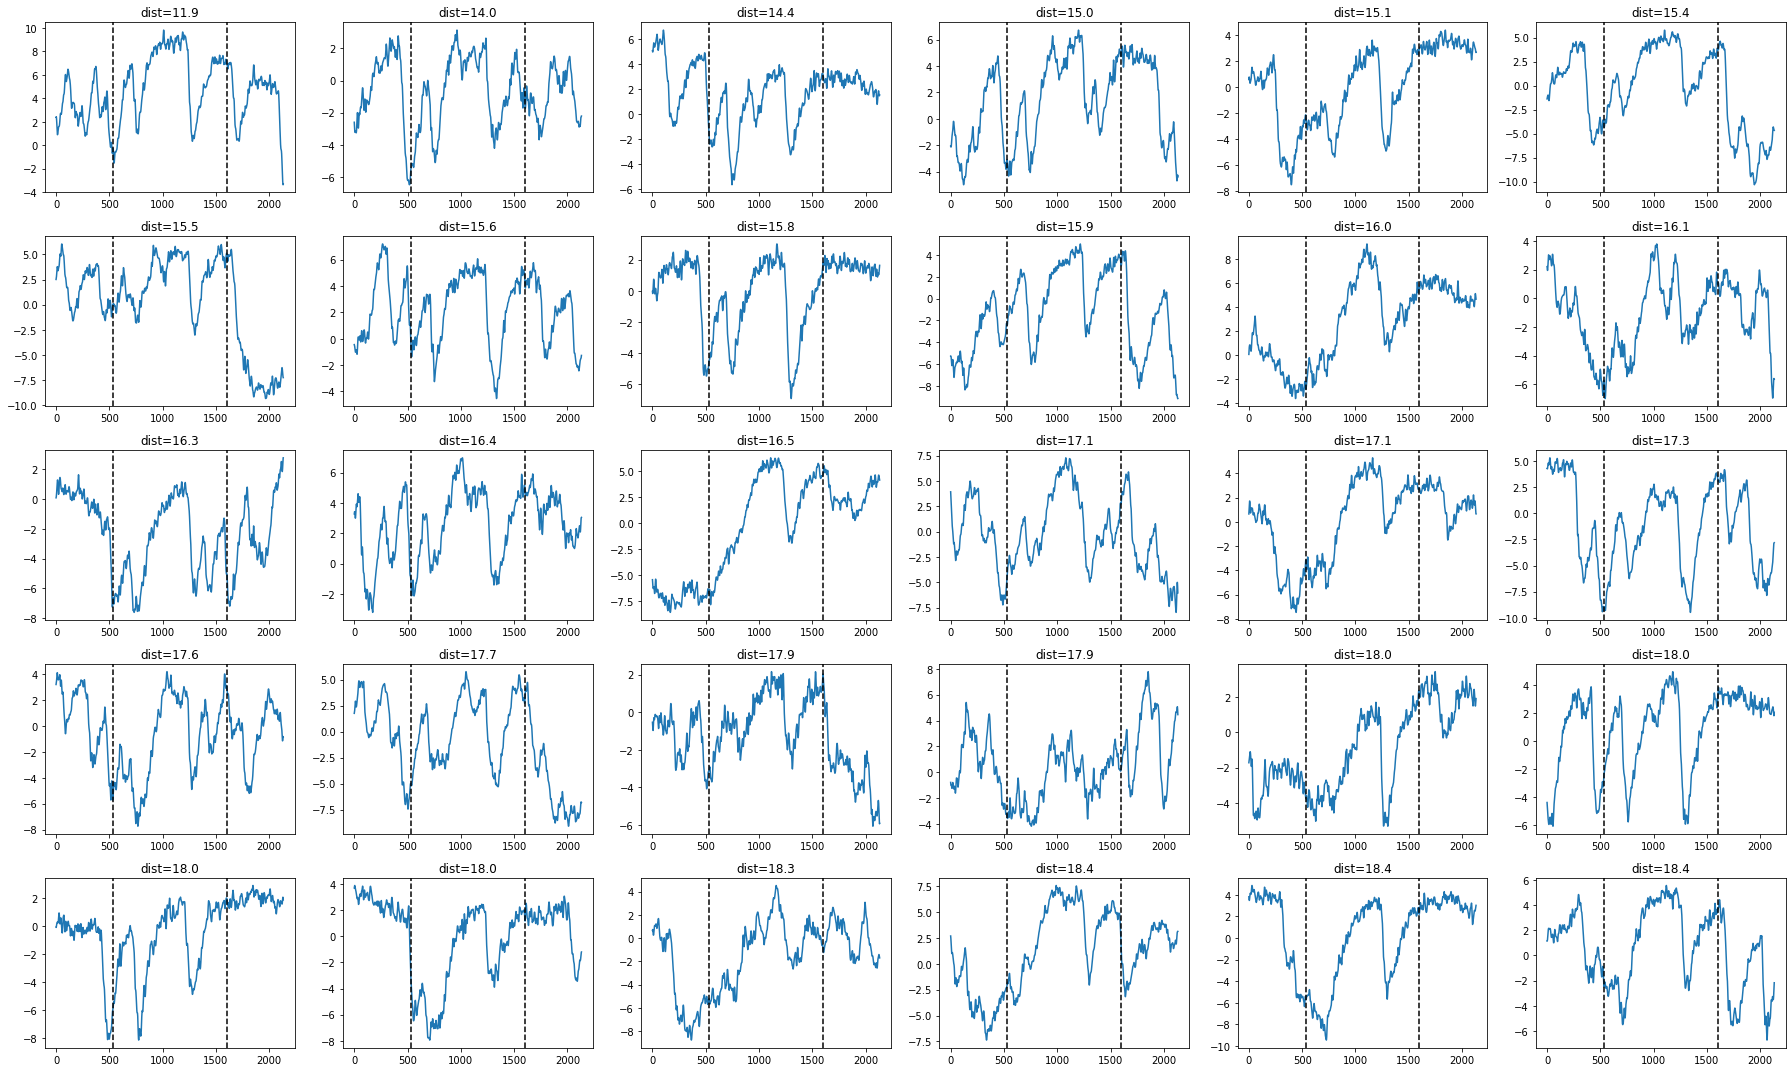

In [56]:
mf.plot_examples(6, n_examples=30, seg_duration=1, is_best=True, peaks_distance_duration=0.1)

In [63]:
%matplotlib tk
mf.plot_labelled_signal(t_start=5*3600, t_stop=5*3600+100, motives_ids=[0,7], max_dist=[15, 25])

# motives for motif 0: 6
# motives for motif 7: 25


In [65]:
mf.calc_overlap_motives(max_dist=15, max_overlap=0.8)

Motif ID: 2; Finish full mass motif search in 2.2 minutes.
Motif ID: 3; Finish full mass motif search in 2.2 minutes.
Motif ID: 4; Finish full mass motif search in 1.2 minutes.
Motif ID: 5; Finish full mass motif search in 1.2 minutes.
Motif ID: 6; Finish full mass motif search in 1.2 minutes.
Motif ID: 7; Finish full mass motif search in 1.2 minutes.
Motif ID: 8; Finish full mass motif search in 0.6 minutes.
Motif ID: 9; Finish full mass motif search in 0.4 minutes.


array([[0.00000000e+00, 7.08128079e-01, 5.25862069e-01, 3.11576355e-01,
        9.96305419e-01, 1.04679803e-02, 0.00000000e+00, 1.53940887e-02,
        9.83374384e-01, 1.00000000e+00],
       [8.96012510e-01, 0.00000000e+00, 7.11493354e-01, 3.11962471e-01,
        9.98436278e-01, 1.09460516e-02, 0.00000000e+00, 3.28381548e-02,
        1.00000000e+00, 1.00000000e+00],
       [8.36978131e-01, 9.04572565e-01, 0.00000000e+00, 2.93240557e-01,
        9.96023857e-01, 1.98807157e-02, 9.94035785e-04, 4.17495030e-02,
        1.00000000e+00, 1.00000000e+00],
       [7.39770867e-01, 6.15384615e-01, 4.77905074e-01, 0.00000000e+00,
        7.44680851e-01, 0.00000000e+00, 1.63666121e-03, 5.07364975e-02,
        1.00000000e+00, 1.00000000e+00],
       [5.97788184e-04, 3.58672910e-03, 1.04812195e-01, 5.22068347e-02,
        0.00000000e+00, 1.09195975e-01, 1.39483910e-03, 2.12414068e-01,
        6.97818073e-01, 8.22855435e-01],
       [4.65477114e-03, 5.04266874e-03, 7.75795190e-03, 0.00000000e+00,
   

In [72]:
P = np.array([[0.00000000e+00, 7.08128079e-01, 5.25862069e-01, 3.11576355e-01,
        9.96305419e-01, 1.04679803e-02, 0.00000000e+00, 1.53940887e-02,
        9.83374384e-01, 1.00000000e+00],
       [8.96012510e-01, 0.00000000e+00, 7.11493354e-01, 3.11962471e-01,
        9.98436278e-01, 1.09460516e-02, 0.00000000e+00, 3.28381548e-02,
        1.00000000e+00, 1.00000000e+00],
       [8.36978131e-01, 9.04572565e-01, 0.00000000e+00, 2.93240557e-01,
        9.96023857e-01, 1.98807157e-02, 9.94035785e-04, 4.17495030e-02,
        1.00000000e+00, 1.00000000e+00],
       [7.39770867e-01, 6.15384615e-01, 4.77905074e-01, 0.00000000e+00,
        7.44680851e-01, 0.00000000e+00, 1.63666121e-03, 5.07364975e-02,
        1.00000000e+00, 1.00000000e+00],
       [5.97788184e-04, 3.58672910e-03, 1.04812195e-01, 5.22068347e-02,
        0.00000000e+00, 1.09195975e-01, 1.39483910e-03, 2.12414068e-01,
        6.97818073e-01, 8.22855435e-01],
       [4.65477114e-03, 5.04266874e-03, 7.75795190e-03, 0.00000000e+00,
        4.04577192e-01, 0.00000000e+00, 8.53374709e-03, 4.79441427e-01,
        9.84871994e-01, 9.82932506e-01],
       [0.00000000e+00, 0.00000000e+00, 4.44444444e-03, 4.44444444e-03,
        6.22222222e-02, 9.77777778e-02, 0.00000000e+00, 2.75555556e-01,
        9.91111111e-01, 9.73333333e-01],
       [4.45950767e-03, 7.49197289e-03, 7.49197289e-03, 5.52978951e-03,
        3.77631110e-01, 2.47235105e-01, 1.10595790e-02, 0.00000000e+00,
        9.76453800e-01, 9.80021406e-01],
       [2.67036187e-02, 9.46895885e-03, 3.40651568e-03, 8.08325755e-04,
        1.15605017e-01, 1.10134384e-02, 1.74656101e-03, 2.65448404e-02,
        0.00000000e+00, 8.56002540e-01],
       [1.13614104e-02, 5.59553720e-03, 3.33858536e-03, 1.07311672e-03,
        6.03244901e-02, 6.48128433e-03, 9.62398331e-04, 1.49469829e-02,
        5.53336456e-02, 0.00000000e+00]])

In [80]:
for i in range(P.shape[0]):
  for j in range(P.shape[1]):
    if P[i,j] > 0.85:
      print(f'{i} -> {j}: {P[i,j]:.0%}')

0 -> 4: 100%
0 -> 8: 98%
0 -> 9: 100%
1 -> 0: 90%
1 -> 4: 100%
1 -> 8: 100%
1 -> 9: 100%
2 -> 1: 90%
2 -> 4: 100%
2 -> 8: 100%
2 -> 9: 100%
3 -> 8: 100%
3 -> 9: 100%
5 -> 8: 98%
5 -> 9: 98%
6 -> 8: 99%
6 -> 9: 97%
7 -> 8: 98%
7 -> 9: 98%
8 -> 9: 86%


In [ ]:
mf.calc_overlap_motives(max_dist=15, max_overlap=0.8)

In [38]:
v, _ = mf.read_signal(3600*4, 3600*4+100)
dists = stumpy.mass(mf.motives[4], v)

In [41]:
find_peaks?

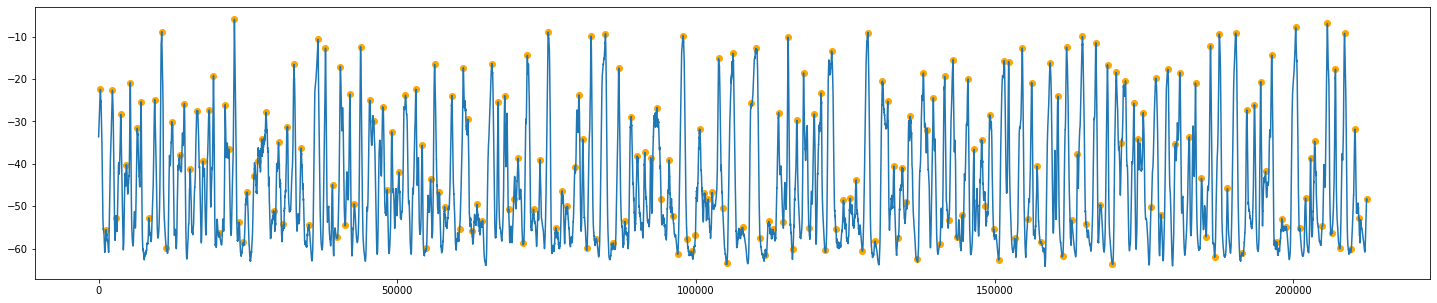

In [49]:
peaks, properties = find_peaks(-dists, distance=mf.fs*0.3)
plt.figure(figsize=(25, 5))
plt.plot(-dists)
plt.scatter(peaks, -dists[peaks], c='orange')

In [82]:
%%time
# no claustrum
mf_ncl = MotifFinder(rd, decimate_q=15, lowpass=150, filter_order=3)
mf_ncl.search(t_start=3*3600, t_stop=4*3600, durations=[1.2, 0.5, 0.2, 0.1], durations2remove=[1.2])
mf_ncl.plot_found_motives()

Finish calculating matrix profile with window of 1.2 seconds in 505.0 minutes.
Finish calculating matrix profile with window of 0.5 seconds in 291.2 minutes.
Finish calculating matrix profile with window of 0.2 seconds in 169.2 minutes.



KeyboardInterrupt



In [11]:
%%time
shw_distance_profile = stumpy.mass(mf.motives[0], v)

CPU times: user 3min 36s, sys: 11.9 s, total: 3min 48s
Wall time: 3min 40s


In [12]:
%%time
saw_distance_profile = stumpy.mass(mf.motives[1], v)

CPU times: user 55.6 s, sys: 10.1 s, total: 1min 5s
Wall time: 1min 3s


In [48]:
saw_distance_profile

array([31.13136821, 31.18987772, 31.24145416, ..., 50.90013997,
       50.92034956, 50.93849111])

In [49]:
shw_distance_profile[shw_distance_profile < 1]

array([9.70465003e-01, 1.34859378e-05, 9.70093733e-01])

In [59]:
v, t = rd.read()
v, t = decimate(v, 15), decimate(t, 15)

In [57]:
rd.root_dir

PosixPath('/media/sil2/Data/Lizard/lorenz_data/2019-10-21_18-00-39')

In [67]:
idx = np.where(saw_distance_profile < 10)[0]
print(len(idx))
# i = idx[v[idx].argmax()]
n = 30
fig, axes = plt.subplots(6, 5, figsize=(25, 5*3))
axes = axes.flatten()
examples = np.random.choice(idx, n)
for j, i in enumerate(examples):
  axes[j].plot(v[i-+len(mf.motives[0]):i+len(mf.motives[0])])
fig.tight_layout()

1432427


In [26]:
fig, axes = plt.subplots(1,2)
for i, m in enumerate(mf.motives):
    axes[i].plot(m)

In [16]:
colors = list(mcolors.TABLEAU_COLORS.values())

def plot_found_motives(v_, t_, w, mi, motives=None):
    n_motives, n_examples = mi.shape
    fig = plt.figure(figsize=(25, 5))
    ax = fig.gca()
    ax.margins(0)
    ax.plot(t_, v_, color='k')
    motives = motives or range(n_motives)
    for i in motives:
        for j in range(n_examples):
            idx = mi[i, j]
            ax.plot(t_[idx:idx+w], v_[idx:idx+w], color=colors[i])

def plot_motives(v_, w, mi, cols=6):
    n_motives, n_examples = mi.shape
    cols = n_examples if n_examples < cols else cols
    fig, axes = plt.subplots(n_motives, cols, figsize=(25, 3*n_motives))
    if n_motives == 1:
        axes = axes.reshape(*axes.shape, 1)
    for i in range(n_motives):
        for j in range(cols):
            idx = mi[i, j]
            axes[i, j].plot(v_[idx:idx+w], color=colors[i])
    fig.tight_layout()

def check_motives(mi, w):
    M = np.zeros((mi.shape[0], mi.shape[0]))
    for row1 in range(mi.shape[0]):
        for row2 in range(mi.shape[0]): #np.arange(mi.shape[0]-1, row1, -1):
            for i in mi[row1, :]:
                if i == -1:
                    break
                if any(i <= k <= (i+w) for k in mi[row2, :]) or any(i <= k+w <= (i+w) for k in mi[row2, :]):
                    M[row1, row2] += 1
        l = np.where(mi[row1,:] == -1)[0]
        M[row1, :] /= l[0] if len(l) > 0 else mi.shape[1]
    return M

In [7]:
%%time
v, t = rd.read(i_start=int((3*3600)*rd.fs), i_stop=int((3.5*3600)*rd.fs), lowpass=150, filter_order=3)
decimate_q = 15
# t_start, t_end = 10, 230  # seconds
# v, t = v[int(t_start*rd.fs):int(t_end*rd.fs)], t[int(t_start*rd.fs):int(t_end*rd.fs)]
if decimate_q:
    v, t = decimate(v, decimate_q), decimate(t, decimate_q)
plt.figure(figsize=(25, 5))
plt.plot(t, v)
plt.margins(0)

CPU times: user 2.29 s, sys: 512 ms, total: 2.8 s
Wall time: 3.74 s


In [8]:
%%time

all_gpu_devices = [device.id for device in cuda.list_devices()]  # Get a list of all available GPU devices
window = int(rd.fs * 2 / decimate_q)
mps = stumpy.gpu_stump(v, m=window, device_id=all_gpu_devices)
motif_distance = np.round(mps[:, 0].min(), 1)
motifs_idx = np.argsort(mps[:, 0])[:2]
print(f"The motif pair matrix profile value is {motif_distance}")

The motif pair matrix profile value is 9.4
CPU times: user 21min 6s, sys: 14min 9s, total: 35min 16s
Wall time: 35min 16s


In [20]:
%%time

motif_distances, motif_indices = stumpy.motifs(v, mps[:, 0], max_motifs=8, max_matches=1000)
motif_indices

CPU times: user 7.61 s, sys: 293 ms, total: 7.9 s
Wall time: 7.9 s


array([[ 612576, 2187342, 3317920, ...,      -1,      -1,      -1],
       [ 691899, 3002477, 3033517, ...,  719284, 3818662, 3457793],
       [3034608, 3316812, 3491362, ...,      -1,      -1,      -1],
       [3031988,  608873, 1613075, ...,      -1,      -1,      -1]])

In [14]:
plot_motives(v, window, motif_indices, cols=6)

In [17]:
check_motives(motif_indices, window)

array([[1.        , 0.90332326, 0.90332326, 0.81570997],
       [0.86388889, 1.        , 0.90277778, 0.81388889],
       [0.90855457, 0.94690265, 1.        , 0.84365782],
       [0.85443038, 0.90189873, 0.87658228, 1.        ]])

In [161]:
# Remove the ShW from the signal
idx = np.full(v.shape, True)
for i in motif_indices.flatten():
    idx[i:i+window] = False

v_nsw, t_nsw = v[idx], t[idx]

In [182]:
%%time

all_gpu_devices = [device.id for device in cuda.list_devices()]  # Get a list of all available GPU devices
window_nsw = int(rd.fs * 0.4 / decimate_q)
mps_nsw = stumpy.gpu_stump(v_nsw, m=window_nsw, device_id=all_gpu_devices)
motif_distance_nsw = np.round(mps_nsw[:, 0].min(), 1)
motifs_idx_nsw = np.argsort(mps_nsw[:, 0])[:2]
print(f"The motif pair matrix profile value is {motif_distance_nsw}")

The motif pair matrix profile value is 3.9
CPU times: user 3min 48s, sys: 1min 2s, total: 4min 50s
Wall time: 4min 50s


In [183]:
%%time

motif_distances_nsw, motif_indices_nsw = stumpy.motifs(v_nsw, mps_nsw[:, 0], max_motifs=8, max_matches=1000)
motif_indices_nsw

CPU times: user 687 ms, sys: 14.2 ms, total: 701 ms
Wall time: 701 ms


array([[ 226580,  452099,  249703,  256395, 1181605,  283160, 1336271,
         924553, 1135849,  430405, 1119313, 1197748,  459759,  858919,
          24376,  800497,  409947,  789983,  508371,  605164,  927657,
        1398776,  758623, 1137638, 1005400,   58388,   64847,  715180,
        1144913,  923196,  159883,  798337, 1219912,  988330, 1304667,
         144541,  110610, 1224095, 1267457,  633085, 1218410,  479272,
         913137,  793438,  148037,  613236,  795957, 1250760,  269646,
        1093893, 1296452,  416616, 1030496, 1328520,  983666,  773123,
        1018028,  763950,  853059,  151669, 1367869,   35812, 1174598,
         285509, 1186118,   33370,  973785, 1205781,  456937,  679056,
         422822, 1128417, 1181390, 1020465, 1215840,  675390,  625836,
         137038,  562093, 1354341,  609058,  323983, 1221957, 1275342,
         592886,  292420,   17461,  286558,  213580,  516535, 1160687,
        1369659, 1310734,  493325,  645780, 1173542,  293575,  998283,
      

In [ ]:
%%time
v, t = rd.read(i_stop=int(rd.fs*3600*5), lowpass=150, filter_order=3)
decimate_q = 15
if decimate_q:
    v, t = decimate(v, decimate_q), decimate(t, decimate_q)

In [187]:
plot_found_motives(v_nsw, np.arange(len(v_nsw)), window_nsw, motif_indices_nsw, motives=None)

In [186]:
plot_motives(v_nsw, window_nsw, motif_indices_nsw)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [179]:
m = check_motives(motif_indices_nsw, window_nsw)
m

array([[1.        , 0.64984227, 0.6214511 , 0.6340694 ],
       [0.7189781 , 1.        , 0.59124088, 0.55109489],
       [0.60501567, 0.53918495, 1.        , 0.68965517],
       [0.44921875, 0.32226562, 0.45507812, 1.        ]])

In [176]:
if np.where(motif_indices_nsw[0,:] == -2)[0]:
    print(2)

/tmp/ipykernel_32130/801949634.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.where(motif_indices_nsw[0,:] == -2)[0]:


In [ ]:
def plot_motives_on_signal(n_motives=20):
    m_idx = np.argsort(mps[:, 0])[:n_motives]
    fig, axs = plt.subplots(1, 1, sharex=True, gridspec_kw={'hspace': 0}, figsize=(25, 5))
    axs.plot(t, v)
    axs.set_xlabel('Time', fontsize ='20')
    axs.margins(0,0)
    for idx in m_idx:
        axs.plot(t[idx:idx+window], v[idx:idx+window], c='red', linewidth=2)
        axs.axvline(x=t[idx], linestyle="dashed", c='black')
    plt.show()

plot_motives_on_signal()

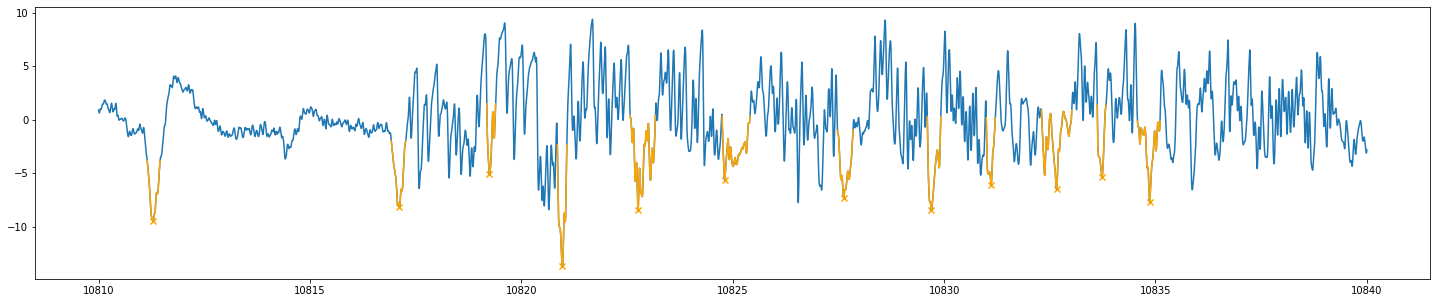

In [132]:
plt.figure(figsize=(25, 5))
[peaks, properties] = find_peaks(-v, height=5, width=rd.fs*0.2, prominence=8, distance=rd.fs*0.5)
plt.plot(t, v)
plt.scatter(t[peaks], v[peaks], c='orange', marker='x')
for i in range(len(peaks)):
  i_start = int(properties['left_ips'][i])
  i_stop = int(properties['right_ips'][i])
  plt.plot(t[i_start:i_stop], v[i_start:i_stop], color='orange')

In [97]:
properties

{'peak_heights': array([10.30356572,  8.82483425,  5.41025861, 13.64491711,  7.37123884,
         5.64385374,  7.52162256,  9.01252024,  5.8966263 ,  6.37985704,
         5.29580461,  7.30088199,  4.95694622]),
 'prominences': array([12.16607381, 13.16197094, 13.88049844, 23.31726319, 15.97864247,
        11.30569974, 16.61940486, 17.37350314, 11.6110337 , 13.68783944,
        13.47142517, 13.835345  , 10.74694662]),
 'left_bases': array([  4792,  57713, 292240, 306773, 373175, 456334, 373175, 373175,
        640307, 640307, 742708, 742708, 854414]),
 'right_bases': array([306773, 306773, 306773, 373175, 456334, 516691, 595114, 742708,
        688228, 742708, 784627, 854414, 922775]),
 'widths': array([10033.6310223 , 10781.52067683,  6578.97184553, 22305.66278056,
        19437.93868186, 34422.21228051, 24141.29957433, 10311.00853772,
        14076.16297062, 16548.45201737,  6436.63866706, 16154.15728427,
         8463.38388629]),
 'width_heights': array([ 4.22052882,  2.24384878, -1.

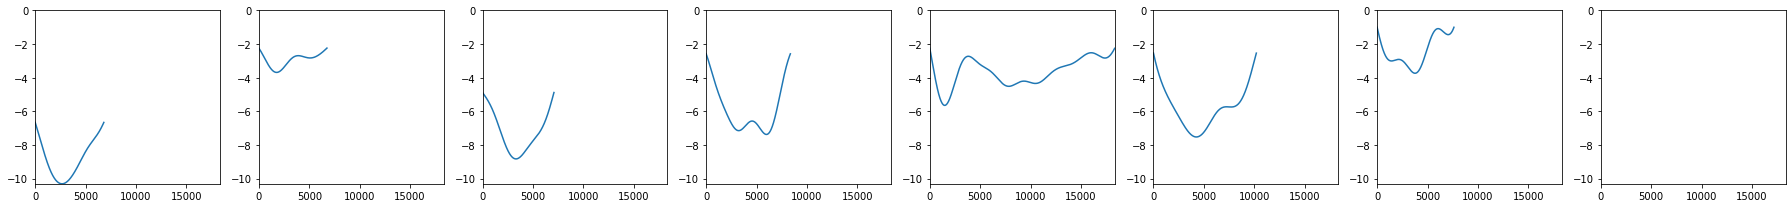

In [61]:
def plot_peaks(cols=8):
  rows = int(np.ceil(len(peaks)/cols))
  fig, axes = plt.subplots(rows, cols, figsize=(25, 3*rows))
  axes = axes.flatten()
  xmax, xmin, ymax, ymin = 0, 0, 0, 0
  for i, peak in enumerate(peaks):
      v_ = v[int(properties['left_ips'][i]):int(properties['right_ips'][i])]
      x_ = np.arange(0, len(v_))
      axes[i].plot(x_, v_)
      if min(v_) < ymin: ymin = min(v_)
      if min(x_) < xmin: xmin = min(x_)
      if max(v_) > ymax: ymax = max(v_)
      if max(x_) > xmax: xmax = max(x_)
  for ax in axes:
      ax.set_xlim([xmin, xmax])
      ax.set_ylim([ymin, ymax])
  fig.tight_layout()

plot_peaks()

In [18]:
for k, v in rd.reader.header.items():
  print(k, v)

nb_block 1
nb_segment [1]
signal_streams [('signals', '0')]
signal_channels [('CSC1', '19', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC10', '14', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC11', '2', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC12', '13', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC13', '3', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC14', '12', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC15', '5', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC16', '10', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC17', '6', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC18', '9', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC19', '7', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC2', '28', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC20', '8', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC21', '18', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC22', '29', 32000., 'int16', 'uV', 0.01525926, 0., '0')
 ('CSC23', '17', 3

In [69]:
rd.fs

32000.0

In [74]:
t = np.arange(rd.reader.segment_t_start(block_index=0, seg_index=0),
              rd.reader.segment_t_stop(block_index=0, seg_index=0), 1/rd.fs)
t.shape

(1786635777,)

In [80]:
x = np.array([1,2,3])
x[2:None]

array([3])

In [67]:
ev_timestamps, ev_durations, ev_labels = rd.reader.get_event_timestamps(block_index=0, seg_index=0, event_channel_index=0,
                                                                        t_start=None, t_stop=None)
ev_timestamps = rd.reader.rescale_event_timestamp(ev_timestamps, dtype='float64', event_channel_index=0)

In [68]:
ev_timestamps[-1]

55832.36300000176

In [64]:
raw_sigs = rd.reader.get_analogsignal_chunk(block_index=0, seg_index=0, i_start=0, i_stop=10000,
                                                      channel_names=[f'CSC32'])

In [65]:
raw_sigs

array([[-276],
       [-204],
       [-176],
       ...,
       [-363],
       [-405],
       [-391]], dtype=int16)